In [99]:
import pandas as pd
import numpy as np
import seaborn as sns

In [63]:
df = pd.read_csv('US Higher Education Value vs. Vulnerability - dataset.csv')

In [303]:
#Checking the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 30 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Institution Name                                    438 non-null    object 
 1   Full Time Enrollment                                438 non-null    float64
 2   State                                               438 non-null    object 
 3   Rank                                                438 non-null    int64  
 4   Rank Pct Rank                                       438 non-null    float64
 5   Undergraduate Admit Rate                            438 non-null    float64
 6   Undergraduate Admit Rate Pct Rank                   438 non-null    float64
 7   Average Monthly Search Volume                       438 non-null    object 
 8   Average Monthly Search Volume Pct Rank              438 non-null    float64
 9  

,Institution Name,Full Time Enrollment,State,Rank,Rank Pct Rank,Undergraduate Admit Rate,Undergraduate Admit Rate Pct Rank,Average Monthly Search Volume,Average Monthly Search Volume Pct Rank,Credential Score,...,Average Undergraduate Tuition and Fees,Average Undergraduate Tuition & Fees Score,Values,Value-to-Cost Ratio,Endowment per Full Time Student,Endowment per Full Time Student Pct Rank,Percentage of International Students,Percentage of International Students PCT Rank,Vulnerability Score,Prof G Categorization
0,Adelphi University,6562.0,NY,166,0.28,0.74,0.29,60500,0.70,1.27,...,38740.0,0.51,5.82,0.42,28738,0.70,0.03,0.39,1.09,Perish
1,Agnes Scott College,998.0,GA,58,0.74,0.70,0.38,14800,0.19,1.32,...,41160.0,0.57,2.92,0.19,229886,0.16,0.04,0.50,0.66,Struggle
2,Albion College,1509.0,MI,140,0.38,0.68,0.43,18100,0.26,1.06,...,45590.0,0.68,2.28,0.12,115513,0.32,0.01,0.07,0.39,Struggle
3,Allegheny College,1724.0,PA,82,0.64,0.64,0.52,22200,0.33,1.49,...,47540.0,0.72,5.43,0.28,128095,0.29,0.04,0.50,0.79,Struggle
4,American University,11435.0,DC,77,0.66,0.32,0.84,110000,0.87,2.37,...,48459.0,0.74,9.02,0.45,59154,0.51,0.03,0.39,0.90,Thrive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,Wittenberg University,1693.0,OH,160,0.30,0.74,0.30,18100,0.26,0.86,...,39500.0,0.52,0.82,0.06,68491,0.45,0.01,0.07,0.52,Struggle
434,Wofford College,1653.0,SC,72,0.68,0.64,0.52,27100,0.42,1.61,...,43985.0,0.64,6.01,0.35,124616,0.30,0.03,0.39,0.69,Struggle
435,Worcester Polytechnic Institute,5371.0,MA,64,0.72,0.42,0.76,40500,0.55,2.04,...,50530.0,0.78,13.41,0.63,96748,0.35,0.07,0.67,1.02,Survive
436,Yale University,13303.0,CT,3,0.99,0.06,0.99,165000,0.94,2.92,...,53430.0,0.86,25.75,1.11,2213406,0.00,0.12,0.83,0.83,Thrive


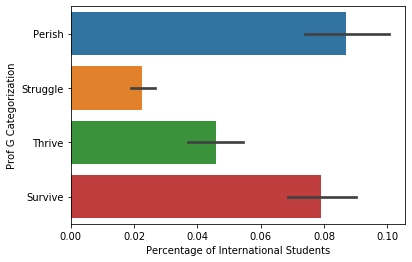

In [351]:
#Renamed Value column
df['Value\n(C x E x E)']
df.rename(columns = {'Value\n(C x E x E)':'Values'}, inplace=True)

#Dropped Ranking List column
df.drop('Ranking List',axis=1,inplace=True)

#df.melt(id_vars=['Institution Name'], value_vars=['Credential Score'])

#Cleaned and changed the format for Average Undergraduate Tuition and Fees column.
df['Average Undergraduate Tuition and Fees'] = df['Average Undergraduate Tuition and Fees'].str.strip('$')
df['Average Undergraduate Tuition and Fees'] = df['Average Undergraduate Tuition and Fees'].str.replace(',','').astype('float')

sns.barplot(x='Percentage of International Students', y='Prof G Categorization', data=df)
df

In [ ]:
#Changed format and datatype of Full Time Enrollment.

df['Full Time Enrollment'] = df['Full Time Enrollment'].str.replace(',', '').astype('float')

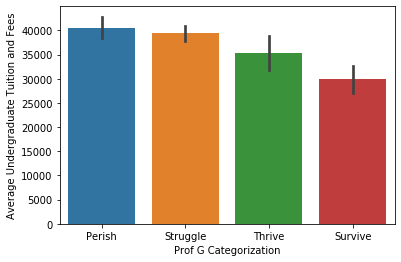

In [279]:
sns.barplot(x='Prof G Categorization', y='Average Undergraduate Tuition and Fees', data=df)

In [326]:
#Continued to clean data and changed datatype

df['Endowment per Full Time Student'] = df['Endowment per Full Time Student'].str.strip('$')
df['Percentage of International Students'] = df['Percentage of International Students'].str.strip('%').astype("float")*100

df['Undergraduate Admit Rate'] = df['Undergraduate Admit Rate'].str.strip('%')
df['Undergraduate Admit Rate'] = df['Undergraduate Admit Rate'].astype('float')/100

df['Average Monthly Search Volume'] = df['Average Monthly Search Volume'].str.replace(',','')



In [242]:
#All colleges under Thrive
categories = df['Prof G Categorization'] == 'Thrive'

df.loc[categories]

,Institution Name,Full Time Enrollment,State,Rank,Rank Pct Rank,Undergraduate Admit Rate,Undergraduate Admit Rate Pct Rank,Average Monthly Search Volume,Average Monthly Search Volume Pct Rank,Credential Score,...,Average Undergraduate Tuition and Fees,Average Undergraduate Tuition & Fees Score,Values,Value-to-Cost Ratio,Endowment per Full Time Student,Endowment per Full Time Student Pct Rank,Percentage of International Students,Percentage of International Students PCT Rank,Vulnerability Score,Prof G Categorization
4,American University,11435.0,DC,77,0.66,0.32,0.84,110000,0.87,2.37,...,48459.0,0.74,9.02,0.45,59154,0.51,0.03,0.39,0.90,Thrive
5,Amherst College,1855.0,MA,2,1.00,0.13,0.95,60500,0.70,2.64,...,56426.0,0.99,21.08,0.79,1281691,0.02,0.07,0.67,0.69,Thrive
7,Auburn University,25806.0,AL,104,0.55,0.75,0.28,135000,0.90,1.73,...,20900.0,0.22,5.39,0.92,29892,0.69,0.01,0.07,0.76,Thrive
12,Ball State University,15926.0,IN,192,0.22,0.65,0.49,60500,0.70,1.41,...,18182.0,0.15,2.78,0.67,13453,0.87,0.00,0.00,0.87,Thrive
25,Birmingham Southern College,1261.0,AL,140,0.38,0.57,0.65,8100,0.08,1.10,...,17650.0,0.14,1.98,0.52,44965,0.57,0.01,0.07,0.64,Thrive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,Washington University in St Louis,13773.0,MO,19,0.92,0.15,0.92,33100,0.47,2.31,...,53399.0,0.86,19.56,0.84,558149,0.06,0.08,0.71,0.76,Thrive
414,Wayne State University,18746.0,MI,246,0.10,0.71,0.37,74000,0.78,1.25,...,20544.0,0.21,3.62,0.65,21169,0.77,0.01,0.07,0.84,Thrive
422,Westminster College,2199.0,PA,114,0.50,0.66,0.47,27100,0.42,1.38,...,36806.0,0.47,5.43,0.43,56121,0.52,0.03,0.39,0.91,Thrive
432,Williams College,2096.0,MA,1,1.00,0.13,0.95,60500,0.70,2.64,...,55450.0,0.95,17.22,0.67,1252990,0.02,0.09,0.74,0.76,Thrive


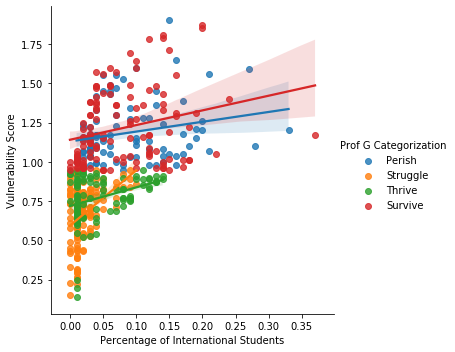

In [273]:
df['Endowment per Full Time Student'] = df['Endowment per Full Time Student'].str.replace(',','')

grouped = df.groupby(['State', 'Prof G Categorization'])
grouped

sns.lmplot(x='Percentage of International Students', y='Vulnerability Score', hue='Prof G Categorization', data=df)


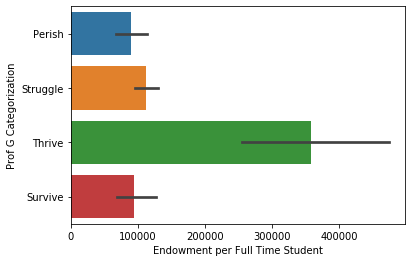

In [332]:
#sns.lmplot(x='Endowment per Full Time Student', y='Percentage of International Students PCT Rank', data=df)

NY_only = df['State'] == 'NY'

sns.barplot(x='Endowment per Full Time Student', y='Prof G Categorization', data=df)



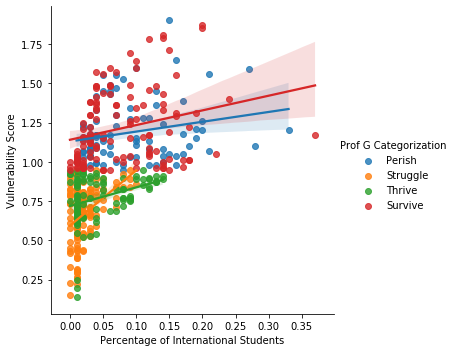

In [314]:
ny_state = df['State'] == 'NY'

##sns.barplot(x='Average Undergraduate Tuition and Fees', y='Vulnerability Score', data=df)
sns.lmplot(x='Percentage of International Students', y='Vulnerability Score', hue='Prof G Categorization', data=df)



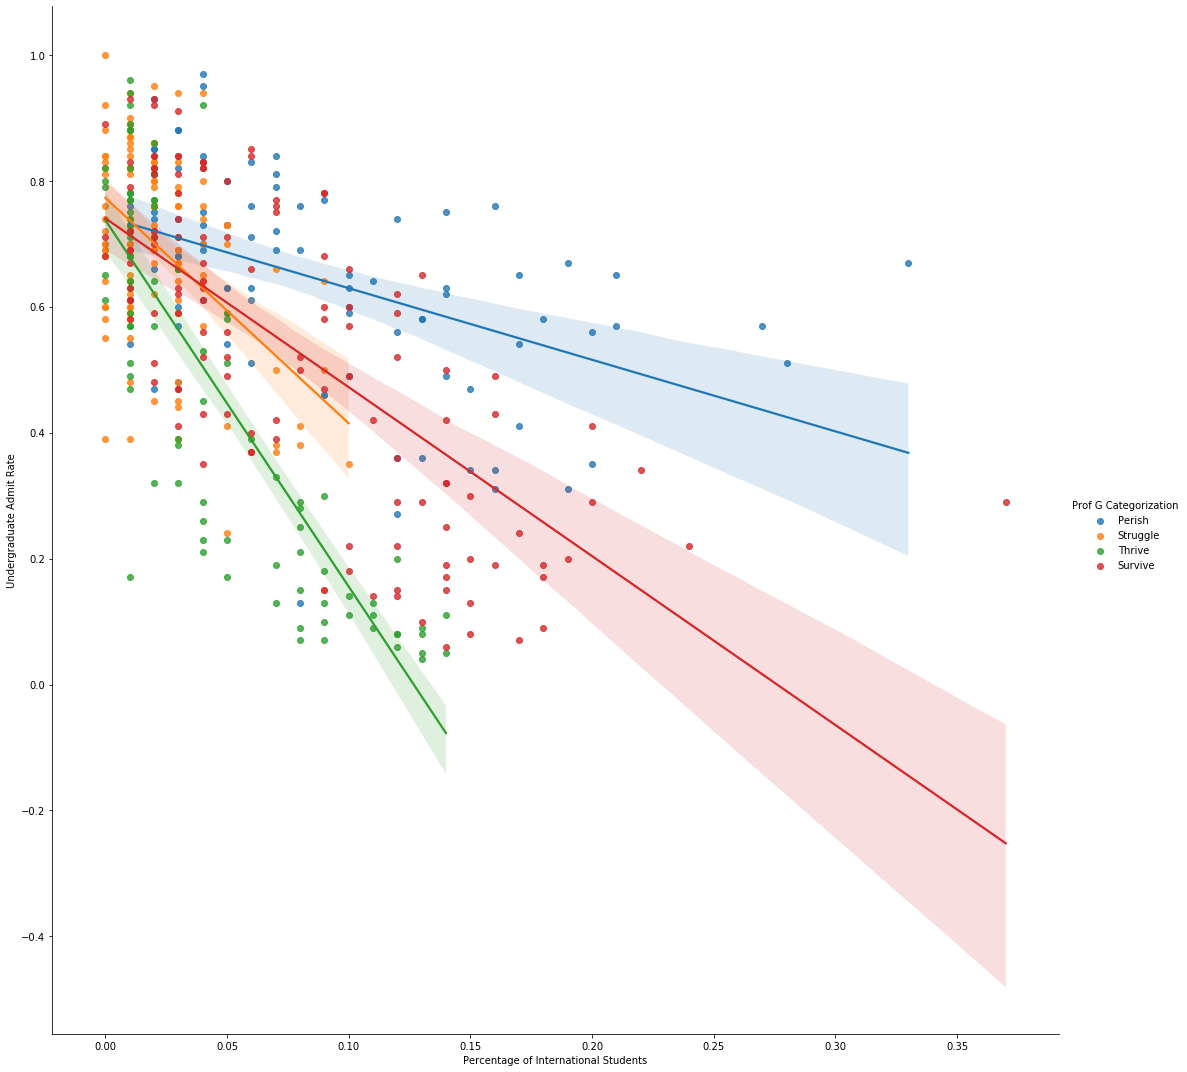

In [331]:
#Exploring the % of International Students and the admit rate.

sns.lmplot(x='Percentage of International Students', 
           y='Undergraduate Admit Rate', hue='Prof G Categorization', height=15, data=df)



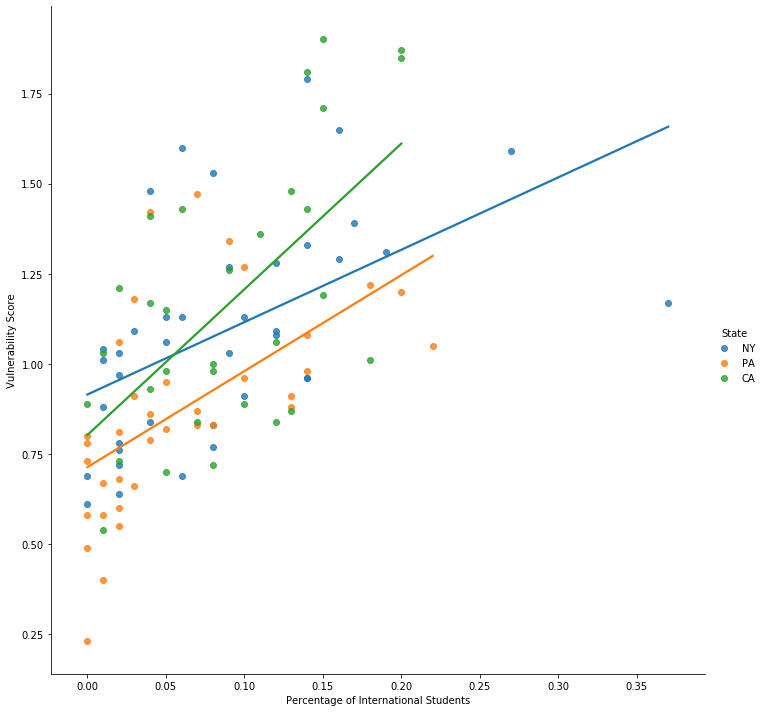

In [330]:
#Picked the top 3 states with highest percentage of international students and vulnerability score.

ny_only = df['State'] == 'NY'
pa_only = df['State'] == 'PA'
ca_only = df['State'] == 'CA'
top3= df[ny_only|pa_only|ca_only]

cx = sns.lmplot(x = 'Percentage of International Students', y = 'Vulnerability Score', 
                data = top3, height = 10, hue='State', ci = False)

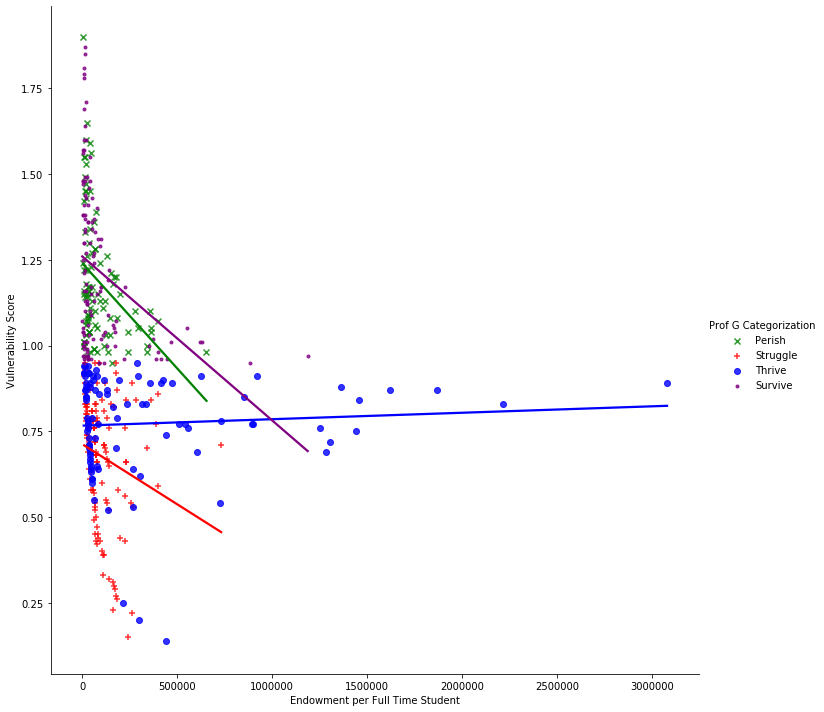

In [306]:
#Endowment per Full Time Student and Vulnerability Score
ax = sns.lmplot(x = 'Endowment per Full Time Student', y = 'Vulnerability Score', data = df, height = 10, hue = 'Prof G Categorization', 
                palette = ["green", "red", "blue", "purple"], markers = ["x", "+", "o","."], ci = False)